In [1]:
import graphcompass as gc
import squidpy as sq
import scanpy as sc
from spatial_sample_aggregation.tl import aggregate_by_node

/Users/lea.zimmermann/software/miniconda3/envs/owkin/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/lea.zimmermann/software/miniconda3/envs/owkin/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [2]:
adata = gc.datasets.mibitof_breast_cancer()
adata.obs_names_make_unique()

/Users/lea.zimmermann/software/miniconda3/envs/owkin/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/lea.zimmermann/software/miniconda3/envs/owkin/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
adata.obs.columns

Index(['event', 'Point_Num', 'CohortNumber', 'Tissue_Type', 'Status', 'Tissue',
       'sublineage', 'phenotype', 'compartment', 'celllineage',
       'sublineage_code', 'phenotype_code', 'compartment_code',
       'celllineage_code', 'manual_gating_cellineage',
       'manual_gating_subineage', 'manual_gating_phenotype', 'innerduct_mask',
       'distal_mask', 'stroma_mask', 'periph_mask', 'epi_mask', 'duct_mask',
       'myoep_mask', 'ERstatus', 'HER2status', 'ARstatus', 'Ki67status',
       'pS6status', 'GLUT1status', 'HIF1astatus', 'COX2status', 'CD36status',
       'CD44status', 'PD1status', 'PDL1status', 'IDO1status', 'GZMBstatus',
       'ECADstatus', 'MMP9status', 'VIMstatus', 'FAPstatus', 'HLADRstatus',
       'CD3status', 'SMAstatus', 'COLIstatus', 'CK5status', 'CK7status',
       'P63status', 'myoep_dist_label', 'myoep_dist_MinDist',
       'myoep_dist_MaxDist', 'myoep_dist_MedDist', 'myoep_dist_MeanDist',
       'celltype_code', 'myoep_dist_MinDist1', 'Neighbor_dist_TUMOR',

In [16]:
sq.gr.spatial_neighbors(adata, delaunay=True, radius=(0,25), coord_type='generic', library_key="Point_Num", key_added='delauney')

In [17]:
aggregate_by_node(adata,
                  library_key="Point_Num",
                  cluster_key="celllineage",
                  metric="degree",
                  aggregation=None,
                  connectivity_key="delauney_connectivities",
                  key_added="degree"
                  )

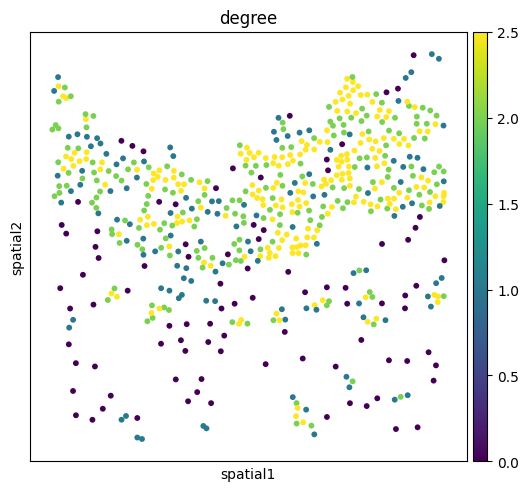

In [18]:
sq.pl.spatial_scatter(adata, color="degree", cmap="viridis", library_key="Point_Num", library_id="2203", img=False, vmax=2.5)

In [24]:
aggregate_by_node(adata,
                  library_key="Point_Num",
                  cluster_key="celllineage",
                  metric="shannon",
                  aggregation='mean',
                  connectivity_key="delauney_connectivities",
                  key_added="shannon"
                  )

/Users/lea.zimmermann/Documents/projects/owkin_hackathon/spatial-sample-aggregation/src/spatial_sample_aggregation/tl/compute_node_features.py:123: RuntimeWarning: invalid value encountered in divide
  probabilities = neighbor_counts / neighbor_counts.sum(axis=1, keepdims=True)
/Users/lea.zimmermann/Documents/projects/owkin_hackathon/spatial-sample-aggregation/src/spatial_sample_aggregation/tl/compute_node_features.py:180: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby([library_key, cluster_key])[node_feature_key]


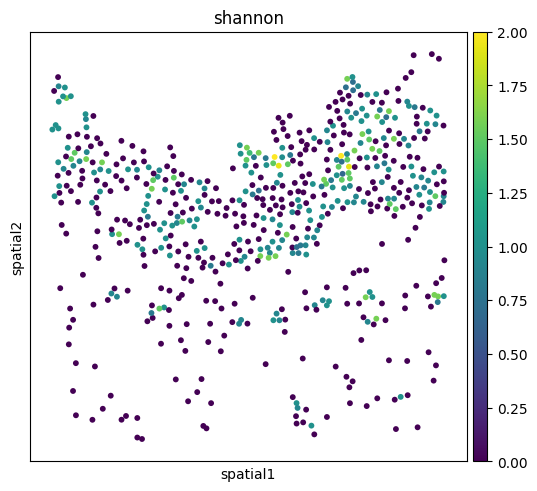

In [25]:
sq.pl.spatial_scatter(adata, color="shannon", cmap="viridis", library_key="Point_Num", library_id="2203", img=False)